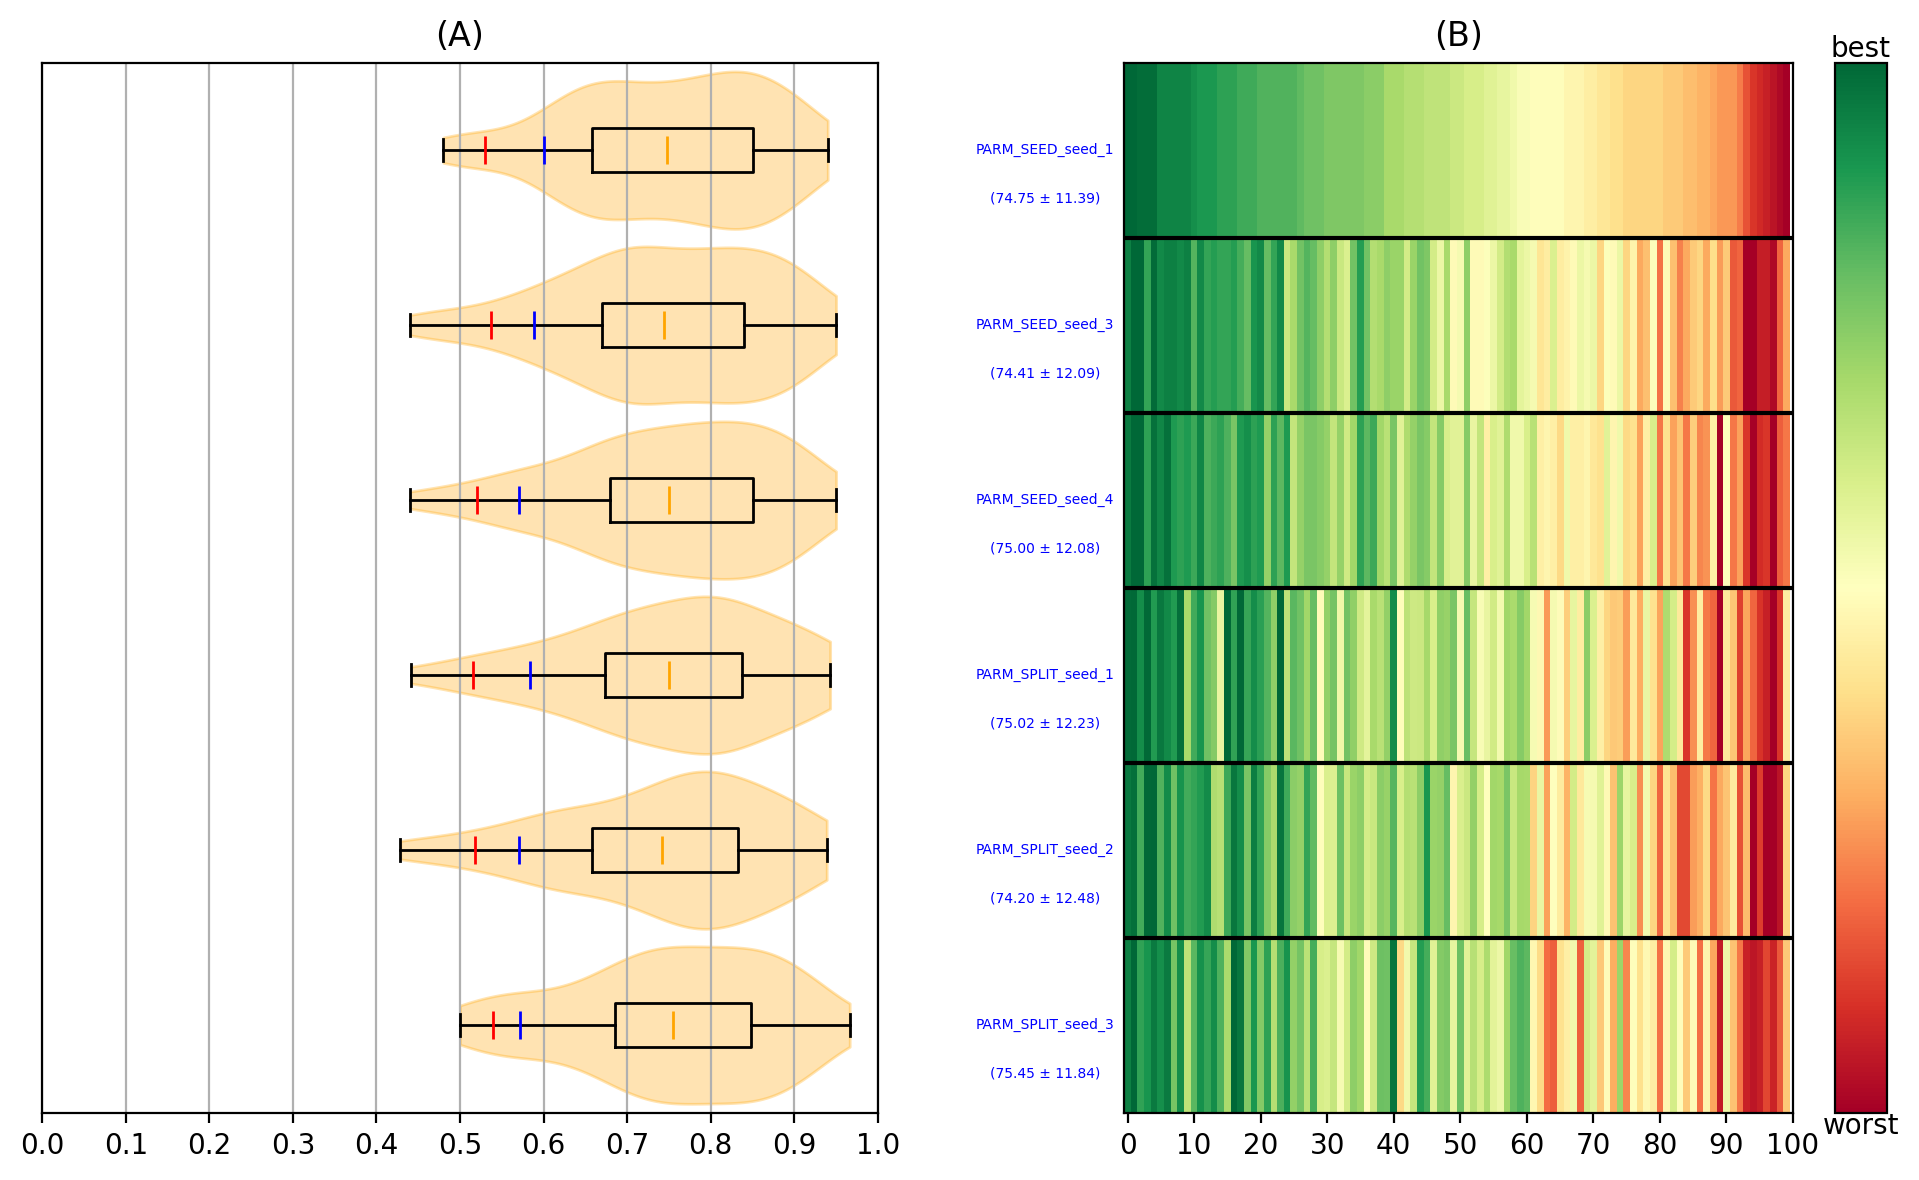

>>> MODE: PARM_
                   overall accuracy  overall std       min       max     range
model                                                                         
PARM_SEED_seed_1           0.747500     0.114489  0.480000  0.940000  0.460000
PARM_SEED_seed_3           0.744100     0.121515  0.440000  0.950000  0.510000
PARM_SEED_seed_4           0.750000     0.121373  0.440000  0.950000  0.510000
PARM_SPLIT_seed_1          0.750201     0.122938  0.441441  0.942857  0.501416
PARM_SPLIT_seed_2          0.742041     0.125434  0.428571  0.938776  0.510204
PARM_SPLIT_seed_3          0.754507     0.119003  0.500000  0.966292  0.466292
                   overall accuracy  overall std       min       max     range
apple                      0.890462     0.019024  0.860000  0.914286  0.054286
aquarium_fish              0.870764     0.027684  0.826087  0.900000  0.073913
baby                       0.614650     0.039437  0.571429  0.676471  0.105042
bear                       0.579363 

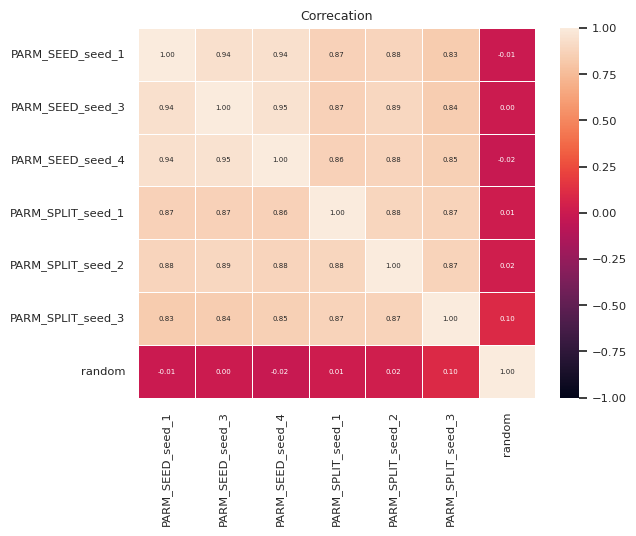

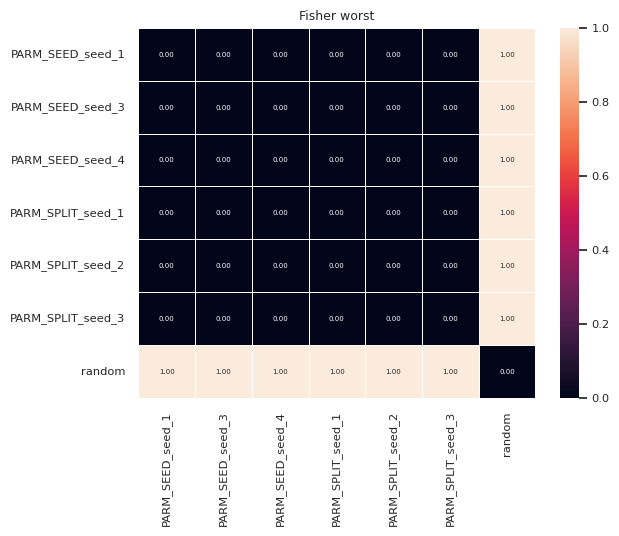

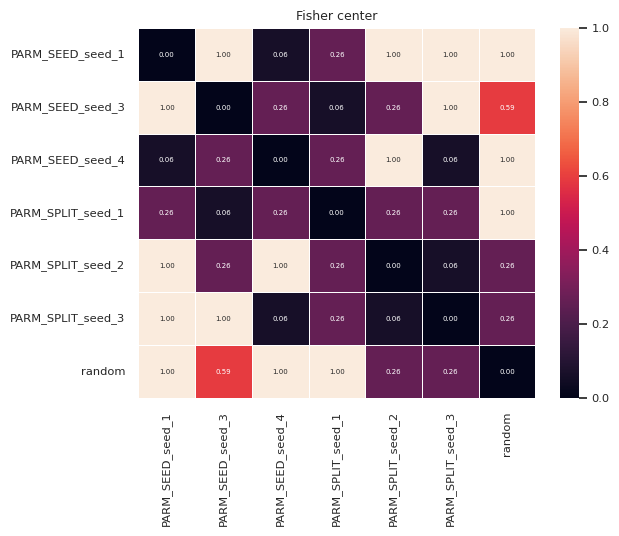

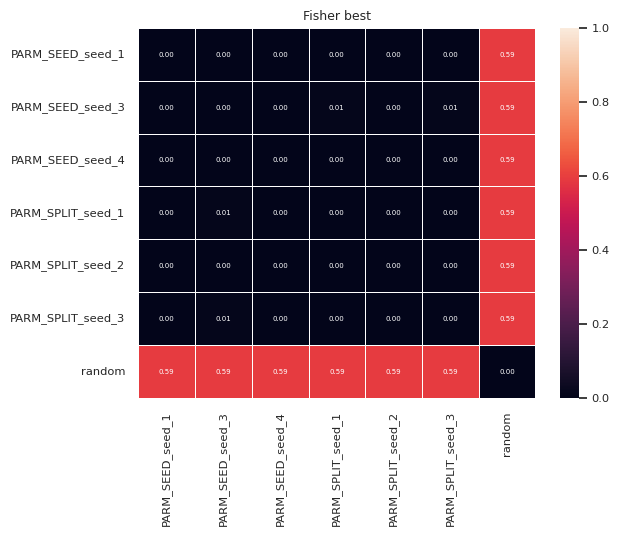

In [1]:
import scipy
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)

###

mode = "cifar100" #imagenet, cifar100, cifar10, custom

if mode == "imagenet":
    file_name = "./quick_results/ImageNet.pkl"

    n_classes, n_fisher = 1000, 50
    accepted = ["BASIC", "PARM", "C_EfficientNet"] 
    
    accepted_C_models =  ['EfficientNet']
    accepted_C_severity = [2, 5]
    accepted_C_names = ['jpeg_compression', 'gaussian_blur', 'fog', 'snow', 'zoom_blur']

elif mode == "cifar100":
    file_name = "./quick_results/cifar100.pkl"

    n_classes, n_fisher = 100, 10
    accepted = ["BASIC_", "PARM_"] 
    
    accepted_C_models =  []
    accepted_C_severity = []
    accepted_C_names = []
    
elif mode == "cifar10":
    file_name = "./quick_results/cifar10.pkl"

    n_classes, n_fisher = 10, 3
    accepted = ["BASIC_", "PARM_", "C_"] 
    
    accepted_C_models =  []
    accepted_C_severity = [5]
    accepted_C_names = ['jpeg_compression', 'gaussian_blur', 'fog', 'snow', 'zoom_blur']
    
else:
    file_name = "./ImageNet.pkl" #"./CIFAR100_RAW.pkl"

    n_classes = 1000 #1000 - ImageNet | 100 - CIFAR100 | 10 - CIFAR10
    n_fisher = 50 #50 - ImageNet | 10 - CIFAR100 | 3 - CIFAR10

    accepted = ["BASIC_", "PARM_", "C_"] #BASIC_ -classic models | PARM_ - subtle experimental parameters like seed or train-test split  | C_ - based on ImageNet-C

    #if "_C" in accepted:
    accepted_C_models =  ['EfficientNet_V2'] # ['EfficientNet_V2', 'ConvNeXt_Large', 'EfficientNet_V2', 'ResNet152', 'ViT_L_16']
    accepted_C_severity = [4] # [1,2,3,4,5]
    accepted_C_names = ['jpeg_compression', 'gaussian_blur', 'fog'] # ['jpeg_compression', 'snow', 'gaussian_noise', 'gaussian_blur', 'impulse_noise', 'saturate', 'zoom_blur', 'contrast', 'frost', 'shot_noise', 'spatter', 'defocus_blur', 'motion_blur', 'pixelate', 'speckle_noise', 'elastic_transform', 'glass_blur', 'fog', 'brightness']

###
if n_classes == 1000:
    classes_name = ['0_tench__tinca_tinca','1_goldfish__carassius_aurat','2_great_white_shark__white_','3_tiger_shark__galeocerdo_c','4_hammerhead__hammerhead_sh','5_electric_ray__crampfish__','6_stingray','7_cock','8_hen','9_ostrich__struthio_camelus','10_brambling__fringilla_mont','11_goldfinch__carduelis_card','12_house_finch__linnet__carp','13_junco__snowbird','14_indigo_bunting__indigo_fi','15_robin__american_robin__tu','16_bulbul','17_jay','18_magpie','19_chickadee','20_water_ouzel__dipper','21_kite','22_bald_eagle__american_eagl','23_vulture','24_great_grey_owl__great_gra','25_european_fire_salamander_','26_common_newt__triturus_vul','27_eft','28_spotted_salamander__ambys','29_axolotl__mud_puppy__ambys','30_bullfrog__rana_catesbeian','31_tree_frog__tree-frog','32_tailed_frog__bell_toad__r','33_loggerhead__loggerhead_tu','34_leatherback_turtle__leath','35_mud_turtle','36_terrapin','37_box_turtle__box_tortoise','38_banded_gecko','39_common_iguana__iguana__ig','40_american_chameleon__anole','41_whiptail__whiptail_lizard','42_agama','43_frilled_lizard__chlamydos','44_alligator_lizard','45_gila_monster__heloderma_s','46_green_lizard__lacerta_vir','47_african_chameleon__chamae','48_komodo_dragon__komodo_liz','49_african_crocodile__nile_c','50_american_alligator__allig','51_triceratops','52_thunder_snake__worm_snake','53_ringneck_snake__ring-neck','54_hognose_snake__puff_adder','55_green_snake__grass_snake','56_king_snake__kingsnake','57_garter_snake__grass_snake','58_water_snake','59_vine_snake','60_night_snake__hypsiglena_t','61_boa_constrictor__constric','62_rock_python__rock_snake__','63_indian_cobra__naja_naja','64_green_mamba','65_sea_snake','66_horned_viper__cerastes__s','67_diamondback__diamondback_','68_sidewinder__horned_rattle','69_trilobite','70_harvestman__daddy_longleg','71_scorpion','72_black_and_gold_garden_spi','73_barn_spider__araneus_cava','74_garden_spider__aranea_dia','75_black_widow__latrodectus_','76_tarantula','77_wolf_spider__hunting_spid','78_tick','79_centipede','80_black_grouse','81_ptarmigan','82_ruffed_grouse__partridge_','83_prairie_chicken__prairie_','84_peacock','85_quail','86_partridge','87_african_grey__african_gra','88_macaw','89_sulphur-crested_cockatoo_','90_lorikeet','91_coucal','92_bee_eater','93_hornbill','94_hummingbird','95_jacamar','96_toucan','97_drake','98_red-breasted_merganser__m','99_goose','100_black_swan__cygnus_atratu','101_tusker','102_echidna__spiny_anteater__','103_platypus__duckbill__duckb','104_wallaby__brush_kangaroo','105_koala__koala_bear__kangar','106_wombat','107_jellyfish','108_sea_anemone__anemone','109_brain_coral','110_flatworm__platyhelminth','111_nematode__nematode_worm__','112_conch','113_snail','114_slug','115_sea_slug__nudibranch','116_chiton__coat-of-mail_shel','117_chambered_nautilus__pearl','118_dungeness_crab__cancer_ma','119_rock_crab__cancer_irrorat','120_fiddler_crab','121_king_crab__alaska_crab__a','122_american_lobster__norther','123_spiny_lobster__langouste_','124_crayfish__crawfish__crawd','125_hermit_crab','126_isopod','127_white_stork__ciconia_cico','128_black_stork__ciconia_nigr','129_spoonbill','130_flamingo','131_little_blue_heron__egrett','132_american_egret__great_whi','133_bittern','134_crane','135_limpkin__aramus_pictus','136_european_gallinule__porph','137_american_coot__marsh_hen_','138_bustard','139_ruddy_turnstone__arenaria','140_red-backed_sandpiper__dun','141_redshank__tringa_totanus','142_dowitcher','143_oystercatcher__oyster_cat','144_pelican','145_king_penguin__aptenodytes','146_albatross__mollymawk','147_grey_whale__gray_whale__d','148_killer_whale__killer__orc','149_dugong__dugong_dugon','150_sea_lion','151_chihuahua','152_japanese_spaniel','153_maltese_dog__maltese_terr','154_pekinese__pekingese__peke','155_shih-tzu','156_blenheim_spaniel','157_papillon','158_toy_terrier','159_rhodesian_ridgeback','160_afghan_hound__afghan','161_basset__basset_hound','162_beagle','163_bloodhound__sleuthhound','164_bluetick','165_black-and-tan_coonhound','166_walker_hound__walker_foxh','167_english_foxhound','168_redbone','169_borzoi__russian_wolfhound','170_irish_wolfhound','171_italian_greyhound','172_whippet','173_ibizan_hound__ibizan_pode','174_norwegian_elkhound__elkho','175_otterhound__otter_hound','176_saluki__gazelle_hound','177_scottish_deerhound__deerh','178_weimaraner','179_staffordshire_bullterrier','180_american_staffordshire_te','181_bedlington_terrier','182_border_terrier','183_kerry_blue_terrier','184_irish_terrier','185_norfolk_terrier','186_norwich_terrier','187_yorkshire_terrier','188_wire-haired_fox_terrier','189_lakeland_terrier','190_sealyham_terrier__sealyha','191_airedale__airedale_terrie','192_cairn__cairn_terrier','193_australian_terrier','194_dandie_dinmont__dandie_di','195_boston_bull__boston_terri','196_miniature_schnauzer','197_giant_schnauzer','198_standard_schnauzer','199_scotch_terrier__scottish_','200_tibetan_terrier__chrysant','201_silky_terrier__sydney_sil','202_soft-coated_wheaten_terri','203_west_highland_white_terri','204_lhasa__lhasa_apso','205_flat-coated_retriever','206_curly-coated_retriever','207_golden_retriever','208_labrador_retriever','209_chesapeake_bay_retriever','210_german_short-haired_point','211_vizsla__hungarian_pointer','212_english_setter','213_irish_setter__red_setter','214_gordon_setter','215_brittany_spaniel','216_clumber__clumber_spaniel','217_english_springer__english','218_welsh_springer_spaniel','219_cocker_spaniel__english_c','220_sussex_spaniel','221_irish_water_spaniel','222_kuvasz','223_schipperke','224_groenendael','225_malinois','226_briard','227_kelpie','228_komondor','229_old_english_sheepdog__bob','230_shetland_sheepdog__shetla','231_collie','232_border_collie','233_bouvier_des_flandres__bou','234_rottweiler','235_german_shepherd__german_s','236_doberman__doberman_pinsch','237_miniature_pinscher','238_greater_swiss_mountain_do','239_bernese_mountain_dog','240_appenzeller','241_entlebucher','242_boxer','243_bull_mastiff','244_tibetan_mastiff','245_french_bulldog','246_great_dane','247_saint_bernard__st_bernard','248_eskimo_dog__husky','249_malamute__malemute__alask','250_siberian_husky','251_dalmatian__coach_dog__car','252_affenpinscher__monkey_pin','253_basenji','254_pug__pug-dog','255_leonberg','256_newfoundland__newfoundlan','257_great_pyrenees','258_samoyed__samoyede','259_pomeranian','260_chow__chow_chow','261_keeshond','262_brabancon_griffon','263_pembroke__pembroke_welsh_','264_cardigan__cardigan_welsh_','265_toy_poodle','266_miniature_poodle','267_standard_poodle','268_mexican_hairless','269_timber_wolf__grey_wolf__g','270_white_wolf__arctic_wolf__','271_red_wolf__maned_wolf__can','272_coyote__prairie_wolf__bru','273_dingo__warrigal__warragal','274_dhole__cuon_alpinus','275_african_hunting_dog__hyen','276_hyena__hyaena','277_red_fox__vulpes_vulpes','278_kit_fox__vulpes_macrotis','279_arctic_fox__white_fox__al','280_grey_fox__gray_fox__urocy','281_tabby__tabby_cat','282_tiger_cat','283_persian_cat','284_siamese_cat__siamese','285_egyptian_cat','286_cougar__puma__catamount__','287_lynx__catamount','288_leopard__panthera_pardus','289_snow_leopard__ounce__pant','290_jaguar__panther__panthera','291_lion__king_of_beasts__pan','292_tiger__panthera_tigris','293_cheetah__chetah__acinonyx','294_brown_bear__bruin__ursus_','295_american_black_bear__blac','296_ice_bear__polar_bear__urs','297_sloth_bear__melursus_ursi','298_mongoose','299_meerkat__mierkat','300_tiger_beetle','301_ladybug__ladybeetle__lady','302_ground_beetle__carabid_be','303_long-horned_beetle__longi','304_leaf_beetle__chrysomelid','305_dung_beetle','306_rhinoceros_beetle','307_weevil','308_fly','309_bee','310_ant__emmet__pismire','311_grasshopper__hopper','312_cricket','313_walking_stick__walkingsti','314_cockroach__roach','315_mantis__mantid','316_cicada__cicala','317_leafhopper','318_lacewing__lacewing_fly','319_dragonfly__darning_needle','320_damselfly','321_admiral','322_ringlet__ringlet_butterfl','323_monarch__monarch_butterfl','324_cabbage_butterfly','325_sulphur_butterfly__sulfur','326_lycaenid__lycaenid_butter','327_starfish__sea_star','328_sea_urchin','329_sea_cucumber__holothurian','330_wood_rabbit__cottontail__','331_hare','332_angora__angora_rabbit','333_hamster','334_porcupine__hedgehog','335_fox_squirrel__eastern_fox','336_marmot','337_beaver','338_guinea_pig__cavia_cobaya','339_sorrel','340_zebra','341_hog__pig__grunter__squeal','342_wild_boar__boar__sus_scro','343_warthog','344_hippopotamus__hippo__rive','345_ox','346_water_buffalo__water_ox__','347_bison','348_ram__tup','349_bighorn__bighorn_sheep__c','350_ibex__capra_ibex','351_hartebeest','352_impala__aepyceros_melampu','353_gazelle','354_arabian_camel__dromedary_','355_llama','356_weasel','357_mink','358_polecat__fitch__foulmart_','359_black-footed_ferret__ferr','360_otter','361_skunk__polecat__wood_puss','362_badger','363_armadillo','364_three-toed_sloth__ai__bra','365_orangutan__orang__orangut','366_gorilla__gorilla_gorilla','367_chimpanzee__chimp__pan_tr','368_gibbon__hylobates_lar','369_siamang__hylobates_syndac','370_guenon__guenon_monkey','371_patas__hussar_monkey__ery','372_baboon','373_macaque','374_langur','375_colobus__colobus_monkey','376_proboscis_monkey__nasalis','377_marmoset','378_capuchin__ringtail__cebus','379_howler_monkey__howler','380_titi__titi_monkey','381_spider_monkey__ateles_geo','382_squirrel_monkey__saimiri_','383_madagascar_cat__ring-tail','384_indri__indris__indri_indr','385_indian_elephant__elephas_','386_african_elephant__loxodon','387_lesser_panda__red_panda__','388_giant_panda__panda__panda','389_barracouta__snoek','390_eel','391_coho__cohoe__coho_salmon_','392_rock_beauty__holocanthus_','393_anemone_fish','394_sturgeon','395_gar__garfish__garpike__bi','396_lionfish','397_puffer__pufferfish__blowf','398_abacus','399_abaya','400_academic_gown__academic_r','401_accordion__piano_accordio','402_acoustic_guitar','403_aircraft_carrier__carrier','404_airliner','405_airship__dirigible','406_altar','407_ambulance','408_amphibian__amphibious_veh','409_analog_clock','410_apiary__bee_house','411_apron','412_ashcan__trash_can__garbag','413_assault_rifle__assault_gu','414_backpack__back_pack__knap','415_bakery__bakeshop__bakehou','416_balance_beam__beam','417_balloon','418_ballpoint__ballpoint_pen_','419_band_aid','420_banjo','421_bannister__banister__balu','422_barbell','423_barber_chair','424_barbershop','425_barn','426_barometer','427_barrel__cask','428_barrow__garden_cart__lawn','429_baseball','430_basketball','431_bassinet','432_bassoon','433_bathing_cap__swimming_cap','434_bath_towel','435_bathtub__bathing_tub__bat','436_beach_wagon__station_wago','437_beacon__lighthouse__beaco','438_beaker','439_bearskin__busby__shako','440_beer_bottle','441_beer_glass','442_bell_cote__bell_cot','443_bib','444_bicycle-built-for-two__ta','445_bikini__two-piece','446_binder__ring-binder','447_binoculars__field_glasses','448_birdhouse','449_boathouse','450_bobsled__bobsleigh__bob','451_bolo_tie__bolo__bola_tie_','452_bonnet__poke_bonnet','453_bookcase','454_bookshop__bookstore__book','455_bottlecap','456_bow','457_bow_tie__bow-tie__bowtie','458_brass__memorial_tablet__p','459_brassiere__bra__bandeau','460_breakwater__groin__groyne','461_breastplate__aegis__egis','462_broom','463_bucket__pail','464_buckle','465_bulletproof_vest','466_bullet_train__bullet','467_butcher_shop__meat_market','468_cab__hack__taxi__taxicab','469_caldron__cauldron','470_candle__taper__wax_light','471_cannon','472_canoe','473_can_opener__tin_opener','474_cardigan','475_car_mirror','476_carousel__carrousel__merr',"477_carpenter's_kit__tool_kit",'478_carton','479_car_wheel','480_cash_machine__cash_dispen','481_cassette','482_cassette_player','483_castle','484_catamaran','485_cd_player','486_cello__violoncello','487_cellular_telephone__cellu','488_chain','489_chainlink_fence','490_chain_mail__ring_mail__ma','491_chain_saw__chainsaw','492_chest','493_chiffonier__commode','494_chime__bell__gong','495_china_cabinet__china_clos','496_christmas_stocking','497_church__church_building','498_cinema__movie_theater__mo','499_cleaver__meat_cleaver__ch','500_cliff_dwelling','501_cloak','502_clog__geta__patten__sabot','503_cocktail_shaker','504_coffee_mug','505_coffeepot','506_coil__spiral__volute__who','507_combination_lock','508_computer_keyboard__keypad','509_confectionery__confection','510_container_ship__container','511_convertible','512_corkscrew__bottle_screw','513_cornet__horn__trumpet__tr','514_cowboy_boot','515_cowboy_hat__ten-gallon_ha','516_cradle','517_crane','518_crash_helmet','519_crate','520_crib__cot','521_crock_pot','522_croquet_ball','523_crutch','524_cuirass','525_dam__dike__dyke','526_desk','527_desktop_computer','528_dial_telephone__dial_phon','529_diaper__nappy__napkin','530_digital_clock','531_digital_watch','532_dining_table__board','533_dishrag__dishcloth','534_dishwasher__dish_washer__','535_disk_brake__disc_brake','536_dock__dockage__docking_fa','537_dogsled__dog_sled__dog_sl','538_dome','539_doormat__welcome_mat','540_drilling_platform__offsho','541_drum__membranophone__tymp','542_drumstick','543_dumbbell','544_dutch_oven','545_electric_fan__blower','546_electric_guitar','547_electric_locomotive','548_entertainment_center','549_envelope','550_espresso_maker','551_face_powder','552_feather_boa__boa','553_file__file_cabinet__filin','554_fireboat','555_fire_engine__fire_truck','556_fire_screen__fireguard','557_flagpole__flagstaff','558_flute__transverse_flute','559_folding_chair','560_football_helmet','561_forklift','562_fountain','563_fountain_pen','564_four-poster','565_freight_car','566_french_horn__horn','567_frying_pan__frypan__skill','568_fur_coat','569_garbage_truck__dustcart','570_gasmask__respirator__gas_','571_gas_pump__gasoline_pump__','572_goblet','573_go-kart','574_golf_ball','575_golfcart__golf_cart','576_gondola','577_gong__tam-tam','578_gown','579_grand_piano__grand','580_greenhouse__nursery__glas','581_grille__radiator_grille','582_grocery_store__grocery__f','583_guillotine','584_hair_slide','585_hair_spray','586_half_track','587_hammer','588_hamper','589_hand_blower__blow_dryer__','590_hand-held_computer__hand-','591_handkerchief__hankie__han','592_hard_disc__hard_disk__fix','593_harmonica__mouth_organ__h','594_harp','595_harvester__reaper','596_hatchet','597_holster','598_home_theater__home_theatr','599_honeycomb','600_hook__claw','601_hoopskirt__crinoline','602_horizontal_bar__high_bar','603_horse_cart__horse-cart','604_hourglass','605_ipod','606_iron__smoothing_iron',"607_jack-o'-lantern",'608_jean__blue_jean__denim','609_jeep__landrover','610_jersey__t-shirt__tee_shir','611_jigsaw_puzzle','612_jinrikisha__ricksha__rick','613_joystick','614_kimono','615_knee_pad','616_knot','617_lab_coat__laboratory_coat','618_ladle','619_lampshade__lamp_shade','620_laptop__laptop_computer','621_lawn_mower__mower','622_lens_cap__lens_cover','623_letter_opener__paper_knif','624_library','625_lifeboat','626_lighter__light__igniter__','627_limousine__limo','628_liner__ocean_liner','629_lipstick__lip_rouge','630_loafer','631_lotion','632_loudspeaker__speaker__spe',"633_loupe__jeweler's_loupe",'634_lumbermill__sawmill','635_magnetic_compass','636_mailbag__postbag','637_mailbox__letter_box','638_maillot','639_maillot__tank_suit','640_manhole_cover','641_maraca','642_marimba__xylophone','643_mask','644_matchstick','645_maypole','646_maze__labyrinth','647_measuring_cup','648_medicine_chest__medicine_','649_megalith__megalithic_stru','650_microphone__mike','651_microwave__microwave_oven','652_military_uniform','653_milk_can','654_minibus','655_miniskirt__mini','656_minivan','657_missile','658_mitten','659_mixing_bowl','660_mobile_home__manufactured','661_model_t','662_modem','663_monastery','664_monitor','665_moped','666_mortar','667_mortarboard','668_mosque','669_mosquito_net','670_motor_scooter__scooter','671_mountain_bike__all-terrai','672_mountain_tent','673_mouse__computer_mouse','674_mousetrap','675_moving_van','676_muzzle','677_nail','678_neck_brace','679_necklace','680_nipple','681_notebook__notebook_comput','682_obelisk','683_oboe__hautboy__hautbois','684_ocarina__sweet_potato','685_odometer__hodometer__mile','686_oil_filter','687_organ__pipe_organ','688_oscilloscope__scope__cath','689_overskirt','690_oxcart','691_oxygen_mask','692_packet','693_paddle__boat_paddle','694_paddlewheel__paddle_wheel','695_padlock','696_paintbrush',"697_pajama__pyjama__pj's__jam",'698_palace','699_panpipe__pandean_pipe__sy','700_paper_towel','701_parachute__chute','702_parallel_bars__bars','703_park_bench','704_parking_meter','705_passenger_car__coach__car','706_patio__terrace','707_pay-phone__pay-station','708_pedestal__plinth__footsta','709_pencil_box__pencil_case','710_pencil_sharpener','711_perfume__essence','712_petri_dish','713_photocopier','714_pick__plectrum__plectron','715_pickelhaube','716_picket_fence__paling','717_pickup__pickup_truck','718_pier','719_piggy_bank__penny_bank','720_pill_bottle','721_pillow','722_ping-pong_ball','723_pinwheel','724_pirate__pirate_ship','725_pitcher__ewer',"726_plane__carpenter's_plane_",'727_planetarium','728_plastic_bag','729_plate_rack','730_plow__plough',"731_plunger__plumber's_helper",'732_polaroid_camera__polaroid','733_pole','734_police_van__police_wagon_','735_poncho','736_pool_table__billiard_tabl','737_pop_bottle__soda_bottle','738_pot__flowerpot',"739_potter's_wheel",'740_power_drill','741_prayer_rug__prayer_mat','742_printer','743_prison__prison_house','744_projectile__missile','745_projector','746_puck__hockey_puck','747_punching_bag__punch_bag__','748_purse','749_quill__quill_pen','750_quilt__comforter__comfort','751_racer__race_car__racing_c','752_racket__racquet','753_radiator','754_radio__wireless','755_radio_telescope__radio_re','756_rain_barrel','757_recreational_vehicle__rv_','758_reel','759_reflex_camera','760_refrigerator__icebox','761_remote_control__remote','762_restaurant__eating_house_','763_revolver__six-gun__six-sh','764_rifle','765_rocking_chair__rocker','766_rotisserie','767_rubber_eraser__rubber__pe','768_rugby_ball','769_rule__ruler','770_running_shoe','771_safe','772_safety_pin','773_saltshaker__salt_shaker','774_sandal','775_sarong','776_sax__saxophone','777_scabbard','778_scale__weighing_machine','779_school_bus','780_schooner','781_scoreboard','782_screen__crt_screen','783_screw','784_screwdriver','785_seat_belt__seatbelt','786_sewing_machine','787_shield__buckler','788_shoe_shop__shoe-shop__sho','789_shoji','790_shopping_basket','791_shopping_cart','792_shovel','793_shower_cap','794_shower_curtain','795_ski','796_ski_mask','797_sleeping_bag','798_slide_rule__slipstick','799_sliding_door','800_slot__one-armed_bandit','801_snorkel','802_snowmobile','803_snowplow__snowplough','804_soap_dispenser','805_soccer_ball','806_sock','807_solar_dish__solar_collect','808_sombrero','809_soup_bowl','810_space_bar','811_space_heater','812_space_shuttle','813_spatula','814_speedboat',"815_spider_web__spider's_web",'816_spindle','817_sports_car__sport_car','818_spotlight__spot','819_stage','820_steam_locomotive','821_steel_arch_bridge','822_steel_drum','823_stethoscope','824_stole','825_stone_wall','826_stopwatch__stop_watch','827_stove','828_strainer','829_streetcar__tram__tramcar_','830_stretcher','831_studio_couch__day_bed','832_stupa__tope','833_submarine__pigboat__sub__','834_suit__suit_of_clothes','835_sundial','836_sunglass','837_sunglasses__dark_glasses_','838_sunscreen__sunblock__sun_','839_suspension_bridge','840_swab__swob__mop','841_sweatshirt','842_swimming_trunks__bathing_','843_swing','844_switch__electric_switch__','845_syringe','846_table_lamp','847_tank__army_tank__armored_','848_tape_player','849_teapot','850_teddy__teddy_bear','851_television__television_sy','852_tennis_ball','853_thatch__thatched_roof','854_theater_curtain__theatre_','855_thimble','856_thresher__thrasher__thres','857_throne','858_tile_roof','859_toaster','860_tobacco_shop__tobacconist','861_toilet_seat','862_torch','863_totem_pole','864_tow_truck__tow_car__wreck','865_toyshop','866_tractor','867_trailer_truck__tractor_tr','868_tray','869_trench_coat','870_tricycle__trike__velocipe','871_trimaran','872_tripod','873_triumphal_arch','874_trolleybus__trolley_coach','875_trombone','876_tub__vat','877_turnstile','878_typewriter_keyboard','879_umbrella','880_unicycle__monocycle','881_upright__upright_piano','882_vacuum__vacuum_cleaner','883_vase','884_vault','885_velvet','886_vending_machine','887_vestment','888_viaduct','889_violin__fiddle','890_volleyball','891_waffle_iron','892_wall_clock','893_wallet__billfold__notecas','894_wardrobe__closet__press','895_warplane__military_plane','896_washbasin__handbasin__was','897_washer__automatic_washer_','898_water_bottle','899_water_jug','900_water_tower','901_whiskey_jug','902_whistle','903_wig','904_window_screen','905_window_shade','906_windsor_tie','907_wine_bottle','908_wing','909_wok','910_wooden_spoon','911_wool__woolen__woollen','912_worm_fence__snake_fence__','913_wreck','914_yawl','915_yurt','916_web_site__website__intern','917_comic_book','918_crossword_puzzle__crosswo','919_street_sign','920_traffic_light__traffic_si','921_book_jacket__dust_cover__','922_menu','923_plate','924_guacamole','925_consomme','926_hot_pot__hotpot','927_trifle','928_ice_cream__icecream','929_ice_lolly__lolly__lollipo','930_french_loaf','931_bagel__beigel','932_pretzel','933_cheeseburger','934_hotdog__hot_dog__red_hot','935_mashed_potato','936_head_cabbage','937_broccoli','938_cauliflower','939_zucchini__courgette','940_spaghetti_squash','941_acorn_squash','942_butternut_squash','943_cucumber__cuke','944_artichoke__globe_artichok','945_bell_pepper','946_cardoon','947_mushroom','948_granny_smith','949_strawberry','950_orange','951_lemon','952_fig','953_pineapple__ananas','954_banana','955_jackfruit__jak__jack','956_custard_apple','957_pomegranate','958_hay','959_carbonara','960_chocolate_sauce__chocolat','961_dough','962_meat_loaf__meatloaf','963_pizza__pizza_pie','964_potpie','965_burrito','966_red_wine','967_espresso','968_cup','969_eggnog','970_alp','971_bubble','972_cliff__drop__drop-off','973_coral_reef','974_geyser','975_lakeside__lakeshore','976_promontory__headland__hea','977_sandbar__sand_bar','978_seashore__coast__seacoast','979_valley__vale','980_volcano','981_ballplayer__baseball_play','982_groom__bridegroom','983_scuba_diver','984_rapeseed','985_daisy',"986_yellow_lady's_slipper__ye",'987_corn','988_acorn','989_hip__rose_hip__rosehip','990_buckeye__horse_chestnut__','991_coral_fungus','992_agaric','993_gyromitra','994_stinkhorn__carrion_fungus','995_earthstar','996_hen-of-the-woods__hen_of_','997_bolete','998_ear__spike__capitulum','999_toilet_tissue__toilet_pap']
elif n_classes == 100:
    classes_name = ['apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar','cattle','chair','chimpanzee','clock','cloud','cockroach','couch','crab','crocodile','cup','dinosaur','dolphin','elephant','flatfish','forest','fox','girl','hamster','house','kangaroo','computer_keyboard','lamp','lawn_mower','leopard','lion','lizard','lobster','man','maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange','orchid','otter','palm_tree','pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum','rabbit','raccoon','ray','road','rocket','rose','sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel','streetcar','sunflower','sweet_pepper','table','tank','telephone','television','tiger','tractor','train','trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm']
elif n_classes == 10:
    classes_name = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

df_main = pd.read_pickle(file_name)
df_main['original_label'] = df_main['original_label'].astype(int)

df_main['model'] = df_main['model'].str.replace(" ", "_")
filter_mask = df_main['model'].str.contains('|'.join(accepted))
df_main = df_main[filter_mask]

if any([a.startswith("C_") for a in accepted]):
    if n_classes == 10: 
        accepted_C_severity = ["level_{}_".format(s) for s in accepted_C_severity]
        accepted_C_names = accepted_C_names
        accepted_C_models = accepted_C_models
        
    if n_classes == 1000: 
        accepted_C_severity = ["_{}".format(s) for s in accepted_C_severity]
        accepted_C_names = ["_{}_".format(s) for s in accepted_C_names]
        accepted_C_models = accepted_C_models

    filter_mask = (~df_main['model'].str.startswith('C_')) | (df_main['model'].str.contains('C_') & df_main['model'].str.contains('|'.join(accepted_C_models)))
    df_main = df_main[filter_mask]   

    filter_mask = (~df_main['model'].str.startswith('C_')) | (df_main['model'].str.contains('C_') & df_main['model'].str.contains('|'.join(accepted_C_severity)))
    df_main = df_main[filter_mask]

    filter_mask = (~df_main['model'].str.startswith('C_')) | (df_main['model'].str.contains('C_') & df_main['model'].str.contains('|'.join(accepted_C_names)))
    df_main = df_main[filter_mask]
    
###

unique_models = df_main["model"].unique()
custom_sort = lambda model_name: 1 if model_name.startswith("BASIC_") else 2 if model_name.startswith("PARM_") else 3 if model_name.startswith("C_") else 4
unique_models = sorted(unique_models, key=custom_sort)
cmap = plt.get_cmap('RdYlGn')

norm_data = []
data = []
for model in unique_models:
    v = df_main[df_main['model'] == model]['accuracy'].values
    mean = np.mean(v)
    std = np.std(v)
    data.append(v)
    norm_data.append((v - mean) / std)

data = np.array(data)
norm_data = np.array(norm_data)
sorted_indices = np.argsort(norm_data[0])[::-1]
norm_data = norm_data[:, sorted_indices]

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, len(unique_models)), dpi=200)
im = ax1.imshow(norm_data, cmap=cmap, aspect="auto", vmax=np.percentile(norm_data, 98.5), vmin=np.percentile(norm_data, 1.5))
for _index, model_data in enumerate(data):
    _i = len(unique_models)-1 - _index
    ax2.boxplot(model_data, positions=[_i], widths=0.25, vert=False, sym='.', medianprops={'linewidth': 0})
    
    ax2.plot(np.percentile(model_data, 5), _i, marker='|', color="red", markersize=10)
    ax2.plot(np.percentile(model_data, 10), _i, marker='|', color="blue", markersize=10)
    ax2.plot(np.mean(model_data), _i, marker='|', color="orange", markersize=10)
    
    violin_plot = ax2.violinplot(model_data, positions=[_i], widths=0.9, vert=False, showmeans=False, showmedians=False, showextrema=False)
    for i, pc in enumerate(violin_plot["bodies"], 1):
        pc.set_facecolor('orange')
        pc.set_edgecolor('orange')       

    if unique_models[_i].startswith("BASIC_"):
        color = "black"                  

    if unique_models[_i].startswith("PARM_"):
        color = "blue"            
            
    if unique_models[_i].startswith("C_"):
        color = "brown"        

    ax2.text(1.2, _index, unique_models[_i], horizontalalignment='center', verticalalignment='center', color=color, fontsize=5)
    ax2.text(1.2, _index-0.275, "({:.2f} ± {:.2f})".format(np.mean(data[_i])*100, np.std(data[_i])*100), horizontalalignment='center', verticalalignment='center', color=color, fontsize=5)

    
ymin, ymax = ax1.get_ylim()
y_values = np.linspace(ymin, ymax, len(unique_models)+1)[1:-1]
for y in y_values:
    ax1.axhline(y, color='black', linestyle = '-')

ax1.set_xticks([i*n_classes//10 for i in range(11)])
ax2.set_xticks([i/10 for i in range(11)])
ax1.set_yticks([])
ax2.set_yticks([])

ax1.grid(False)
ax2.grid(True)

cbar = fig.colorbar(im, ax=ax1, ticks=[], location="right", pad=0.05)
y = [np.percentile(norm_data, 1.5) - 0.05, np.percentile(norm_data, 98.5) + 0.05]
for i, yi in enumerate(y):
    cbar.ax.text(0.5, yi, ["worst", "best"][i], horizontalalignment='center', verticalalignment='center')

ax1.set_title("(B)")
ax2.set_title("(A)")

fig.tight_layout()
plt.show()    
    
###  

for mode in ["BASIC_", "PARM_"]:
    filter_mask = df_main['model'].str.contains(mode)
    df_main_for_tables = df_main[filter_mask]
    
    if len(df_main_for_tables) == 0:
        continue
    
    print(">>> MODE:", mode)
    grouped = df_main_for_tables.groupby('model')
    table1 = pd.DataFrame({
        'overall accuracy': grouped['accuracy'].mean(),
        'overall std': grouped['accuracy'].std(),
        'min': grouped['accuracy'].min(),
        'max': grouped['accuracy'].max(),
        'range': grouped['accuracy'].max() - grouped['accuracy'].min()
    })

    grouped = df_main_for_tables.groupby('original_label')
    table2 = pd.DataFrame({
        'overall accuracy': grouped['accuracy'].mean(),
        'overall std': grouped['accuracy'].std(),
        'min': grouped['accuracy'].min(),
        'max': grouped['accuracy'].max(),
        'range': grouped['accuracy'].max() - grouped['accuracy'].min()
    })

    table2.index = classes_name

    print(table1)
    print(table2)

###

def calculate_corr(list1, list2):
    return scipy.stats.pearsonr(list1, list2)[0]

def calculate_fisher(list1, list2, mode="worst", n=n_fisher, classes=n_classes):
    if mode == "worst":
        m1 = np.argsort(list1)[:n]
        m2 = np.argsort(list2)[:n]
    elif mode == "best":
        m1 = np.argsort(list1)[-n:]
        m2 = np.argsort(list2)[-n:]
    elif mode == "center":
        m1 = np.argsort(list1)[len(list1)//2 - n//2:len(list1)//2 + n//2]
        m2 = np.argsort(list2)[len(list2)//2 - n//2:len(list2)//2 + n//2]
    else:
        return 

    _in_m1 = len(set(m1) - set(m2))
    _in_m2 = len(set(m2) - set(m1))
    _all = len(set(m1).intersection(set(m2)))
    _none = classes - (_all + _in_m1 + _in_m2) 
    
    oddsratio, pvalue = scipy.stats.fisher_exact([[_all, _in_m2], [_in_m1, _none]])
    return pvalue

def draw(title, data, func, _min=-1, _max=1):
    result = np.zeros((len(data), len(data)))
    labels = list(data.keys())
    for i, group_a in enumerate(labels):
        for j, group_b in enumerate(labels):
            result[i][j] = func(data[group_a], data[group_b])

    plt.figure()
    sns.set(font_scale=0.75)
    sns.heatmap(result, annot=True, fmt=".2f", vmin=_min, vmax=_max, annot_kws={"size": 5}, linewidth=0.5, xticklabels=labels, yticklabels=labels).set(title=title)

###    
    
_data = {}
for model in df_main["model"].unique():
    _data[model] = df_main[df_main["model"] == model]["accuracy"].to_numpy()
    
_random = list(range(0, n_classes))
random.shuffle(_random)
_data["random"] = np.array(_random)

draw("Correcation", _data, calculate_corr)
draw("Fisher worst", _data, lambda list1, list2: calculate_fisher(list1, list2, mode="worst"), _min=0)
draw("Fisher center", _data, lambda list1, list2: calculate_fisher(list1, list2, mode="center"), _min=0)
draw("Fisher best", _data, lambda list1, list2: calculate_fisher(list1, list2, mode="best"), _min=0)

In [2]:
table1.style.background_gradient(cmap='RdBu_r', axis=0)

,overall accuracy,overall std,min,max,range
model,,,,,
PARM_SEED_seed_1,0.747500,0.114489,0.480000,0.940000,0.460000
PARM_SEED_seed_3,0.744100,0.121515,0.440000,0.950000,0.510000
PARM_SEED_seed_4,0.750000,0.121373,0.440000,0.950000,0.510000
PARM_SPLIT_seed_1,0.750201,0.122938,0.441441,0.942857,0.501416
PARM_SPLIT_seed_2,0.742041,0.125434,0.428571,0.938776,0.510204
PARM_SPLIT_seed_3,0.754507,0.119003,0.500000,0.966292,0.466292


In [3]:
table2.style.background_gradient(cmap='RdBu_r', axis=0)

,overall accuracy,overall std,min,max,range
apple,0.890462,0.019024,0.860000,0.914286,0.054286
aquarium_fish,0.870764,0.027684,0.826087,0.900000,0.073913
baby,0.614650,0.039437,0.571429,0.676471,0.105042
bear,0.579363,0.054727,0.515464,0.642857,0.127393
beaver,0.651083,0.034007,0.616822,0.690000,0.073178
bed,0.798605,0.035262,0.750000,0.840426,0.090426
bee,0.826658,0.015694,0.804124,0.840000,0.035876
beetle,0.738190,0.054126,0.656566,0.800000,0.143434
bicycle,0.888331,0.039448,0.850000,0.941176,0.091176
bottle,0.825789,0.046573,0.760870,0.880000,0.119130
